In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten,Reshape,TimeDistributed
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DatasetPath='/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/'
Folders = os.listdir(DatasetPath)
folders=sorted(Folders)
folders

Mounted at /content/drive


['character_01_ka',
 'character_02_kha',
 'character_03_ga',
 'character_04_gha',
 'character_05_kna',
 'character_06_cha',
 'character_07_chha',
 'character_08_ja',
 'character_09_jha',
 'character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [ ]:
labels = [char.split('_')[-1] for char in folders]
print(labels)

['ka', 'kha', 'ga', 'gha', 'kna', 'cha', 'chha', 'ja', 'jha', 'yna', 'taamatar', 'thaa', 'daa', 'dhaa', 'adna', 'tabala', 'tha', 'da', 'dha', 'na', 'pa', 'pha', 'ba', 'bha', 'ma', 'yaw', 'ra', 'la', 'waw', 'motosaw', 'petchiryakha', 'patalosaw', 'ha', 'chhya', 'tra', 'gya', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
data = []
label = []

for category in folders:
    path = os.path.join(DatasetPath, category)
    imgName = os.listdir(path)
    for iName in imgName:
        imagePath = os.path.join(path, iName)
        image = cv2.imread(imagePath)
        try:

            blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

            # Add the original image and the blurred image to sharpening
            sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

            gray = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)

            # Resize the sharpened image to the specified size
            resized = cv2.resize(gray, (32, 32))

            # Normalize the pixel values to the [0, 1] range
            resized = resized.astype('float32') / 255.0



            # Append the preprocessed and sharpened image and its label to the data and label lists
            data.append(resized)
            print(imagePath)
            print(category)
            label.append(category)

        except Exception as e:
            print('exception')
            print(e)


Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/43932.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/68345.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/50015.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/50037.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/99360.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/30610.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/5878.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/78777.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/42136.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDa

In [ ]:
data=np.array(data)
data.shape

(64904, 32, 32)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
label_encoder = LabelEncoder()
newLabel = label_encoder.fit_transform(label)
newLabel = to_categorical(newLabel)
newLabel

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
optimizerSGDm=tf.keras.optimizers.legacy.SGD(learning_rate=0.001,momentum=0.9)
modelSGDm=Sequential()
modelSGDm.add(LSTM(64,return_sequences=True,input_shape=data.shape[1:]))
modelSGDm.add(LSTM(128,return_sequences=False))
modelSGDm.add(Dropout(0.2))
modelSGDm.add(Dense(len(folders),activation='softmax'))
modelSGDm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32, 64)            24832     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 46)                5934      
                                                                 
Total params: 129582 (506.18 KB)
Trainable params: 129582 (506.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelSGDm.compile(
    optimizer=optimizerSGDm,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

early_stopping = EarlyStopping(
      monitor='val_accuracy',
      min_delta=0,
      patience=5,
      verbose=1,
      mode='max',
      restore_best_weights=True
  )

checkpoint = ModelCheckpoint(
     '/content/drive/My Drive/DevnagariCharacterDetection/Weights/LSTM2SGD_momentum.h5',
      monitor='val_accuracy',
      verbose=1,
      save_best_only=True,
      mode='max'
  )

In [ ]:
xTrain,xTest,yTrain,yTest=train_test_split(data,newLabel,test_size=0.3,random_state=42)

with tf.device('/cpu:0'):
  historySGDm=modelSGDm.fit(xTrain,yTrain,epochs=200,validation_split=0.2,callbacks=[early_stopping, checkpoint])

Epoch 1/200
1380/1380 [==============================] - ETA: 0s - loss: 3.6769 - accuracy: 0.0709
Epoch 1: val_accuracy improved from -inf to 0.13241, saving model to /content/drive/My Drive/DevnagariCharacterDetection/Weights/LSTM2SGD_momentum.h5
1380/1380 [==============================] - 72s 50ms/step - loss: 3.6769 - accuracy: 0.0709 - val_loss: 3.4864 - val_accuracy: 0.1324
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1380/1380 [==============================] - ETA: 0s - loss: 3.1215 - accuracy: 0.2050
Epoch 2: val_accuracy improved from 0.13241 to 0.33442, saving model to /content/drive/My Drive/DevnagariCharacterDetection/Weights/LSTM2SGD_momentum.h5
1380/1380 [==============================] - 64s 46ms/step - loss: 3.1215 - accuracy: 0.2050 - val_loss: 2.6893 - val_accuracy: 0.3344
Epoch 3/200
1380/1380 [==============================] - ETA: 0s - loss: 2.3392 - accuracy: 0.3995
Epoch 3: val_accuracy improved from 0.33442 to 0.50852, saving model to /content/drive/My Drive/DevnagariCharacterDetection/Weights/LSTM2SGD_momentum.h5
1380/1380 [==============================] - 62s 45ms/step - loss: 2.3392 - accuracy: 0.3995 - val_loss: 1.9259 - val_accuracy: 0.5085
Epoch 4/200
1380/1380 [==============================] - ETA: 0s - loss: 1.7119 - accuracy: 0.5530
Epoch 4: val_accuracy improved from 0.50852 to 0.62561, saving model to /content/drive/My Drive/DevnagariCharacterDetection/Weights/LSTM2SG

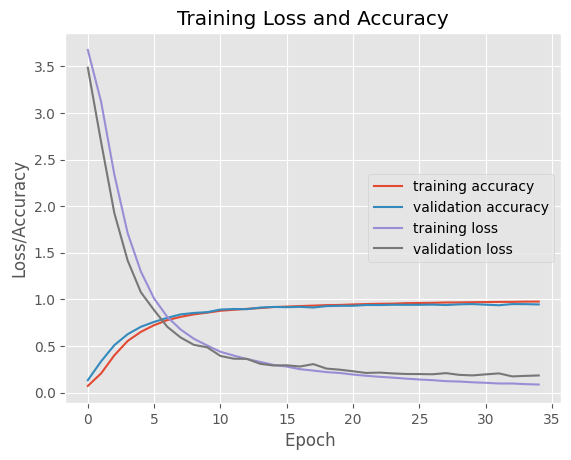

In [ ]:
import matplotlib.pyplot as plt
N=35
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), historySGDm.history["accuracy"], label="training accuracy")
plt.plot(np.arange(0, N), historySGDm.history["val_accuracy"], label="validation accuracy")
plt.plot(np.arange(0, N), historySGDm.history["loss"], label="training loss")
plt.plot(np.arange(0, N), historySGDm.history["val_loss"], label="validation loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("/content/drive/My Drive/DevnagariCharacterDetection/Figures/LSTM2SGDmfig")

In [ ]:
modelSGDm.save('/content/drive/My Drive/DevnagariCharacterDetection/Models/LSTM2SGDm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


305/305 [==============================] - 5s 15ms/step


<Figure size 640x480 with 0 Axes>

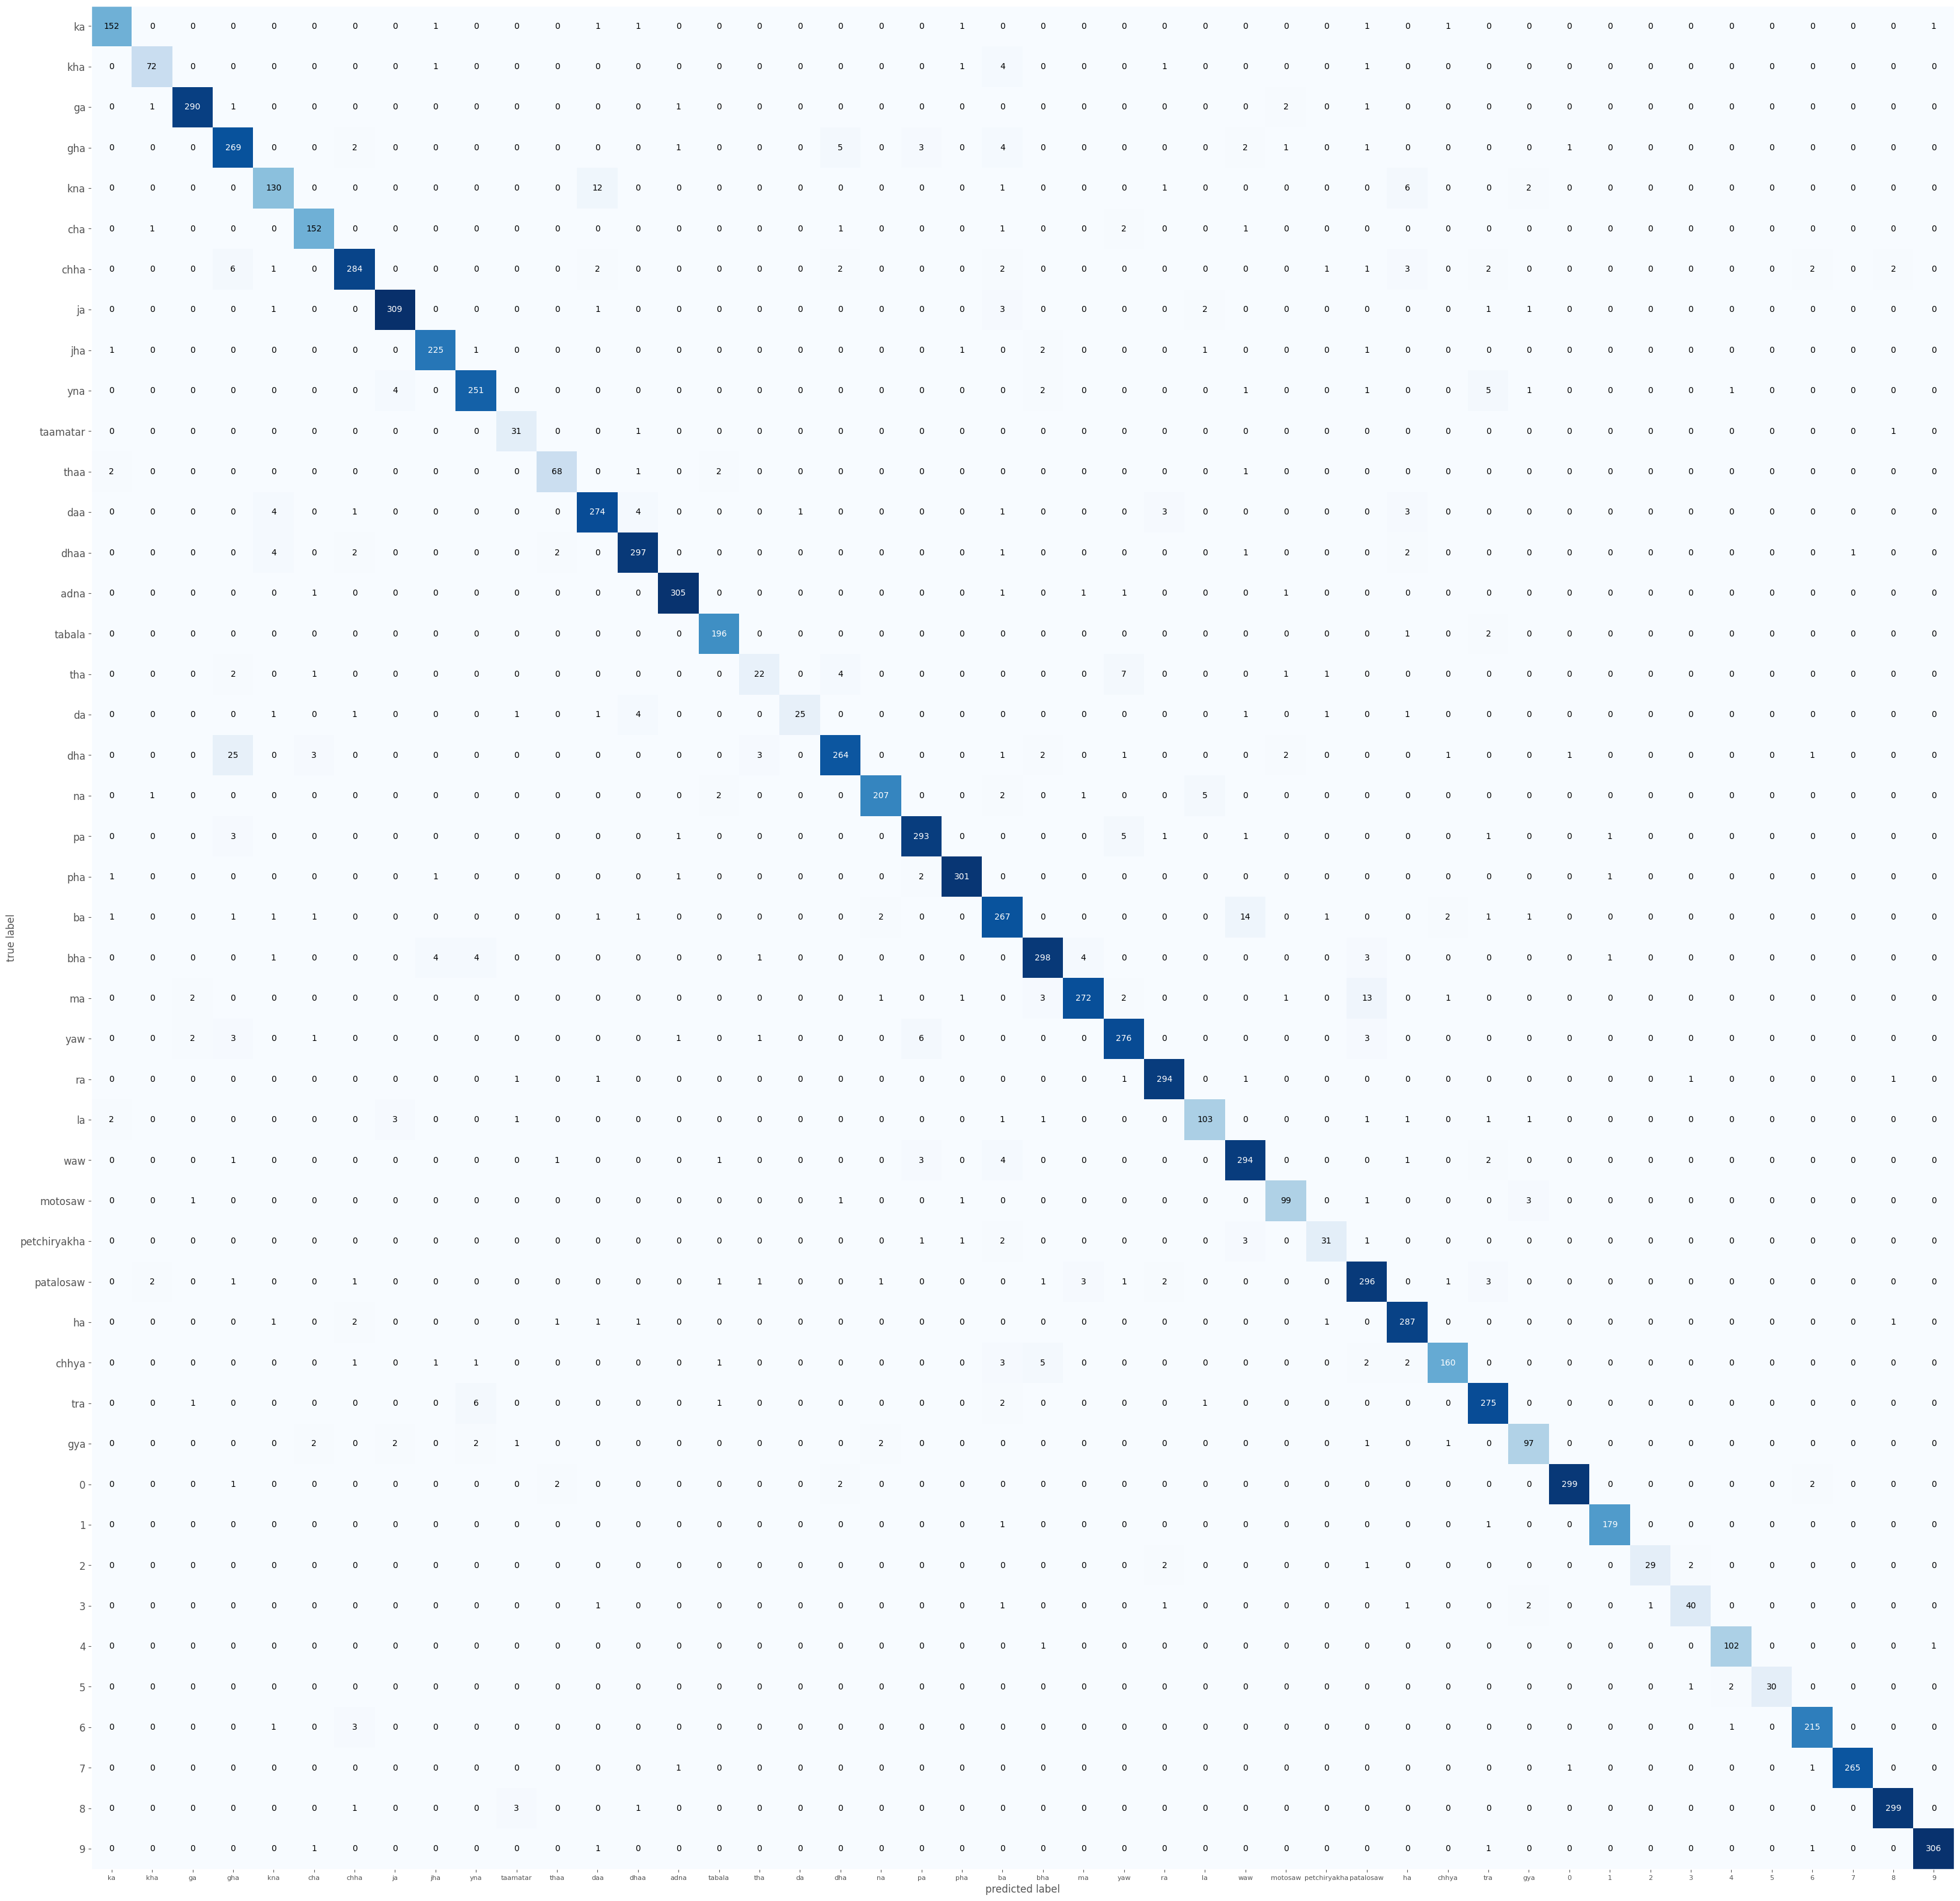

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(yTest, axis=1)
predictions = modelSGDm.predict(xTest)
predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(40,50), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(labels)),labels, fontsize=8)
plt.yticks(range(len(labels)),labels, fontsize=12)
plt.savefig("/content/drive/My Drive/DevnagariCharacterDetection/Figures/LSTM2SGDmconfusion")

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP)
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)

# # Overall accuracy
# ACC = (TP+TN)/(TP+FP+FN+TN)
# print(ACC)

# avg=np.average(ACC)
# print(f"\n Average Accuracy: {avg*100}")

label_metrics = {}
for i in range(len(folders)):
    label = Folders[i]  # Assuming Folders contains label names
    TP = cm[i, i]
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP
    TN = np.sum(cm) - TP - FP - FN

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = precision_score(test_labels, predictions, average=None)[i]
    recall = recall_score(test_labels, predictions, average=None)[i]
    f1 = f1_score(test_labels, predictions, average=None)[i]

    label_metrics[label] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print the results
for label, metrics in label_metrics.items():
    print(f"Label: {label}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print()

accuracy_avg = np.mean([metrics['Accuracy'] for metrics in label_metrics.values()])
precision_avg = np.mean([metrics['Precision'] for metrics in label_metrics.values()])
recall_avg = np.mean([metrics['Recall'] for metrics in label_metrics.values()])
f1_avg = np.mean([metrics['F1 Score'] for metrics in label_metrics.values()])

Label: digit_9
Accuracy: 0.9985620377978636
Precision: 0.9559748427672956
Recall: 0.9559748427672956
F1 Score: 0.9559748427672956

Label: digit_8
Accuracy: 0.9986647493837305
Precision: 0.935064935064935
Recall: 0.9
F1 Score: 0.9171974522292993

Label: digit_7
Accuracy: 0.9987674609695973
Precision: 0.9797297297297297
Recall: 0.9797297297297297
F1 Score: 0.9797297297297298

Label: digit_6
Accuracy: 0.9934264585045193
Precision: 0.8594249201277955
Recall: 0.9307958477508651
F1 Score: 0.893687707641196

Label: digit_5
Accuracy: 0.9961996713229252
Precision: 0.896551724137931
Recall: 0.8552631578947368
F1 Score: 0.8754208754208755

Label: character_34_chhya
Accuracy: 0.9983566146261298
Precision: 0.9382716049382716
Recall: 0.9620253164556962
F1 Score: 0.95

Label: character_35_tra
Accuracy: 0.9960969597370584
Precision: 0.9530201342281879
Recall: 0.922077922077922
F1 Score: 0.9372937293729373

Label: digit_4
Accuracy: 0.998151191454396
Precision: 0.9716981132075472
Recall: 0.9716981132075